# WEEK2 TASK 3 行列積のスクラッチ

## 2.行列積

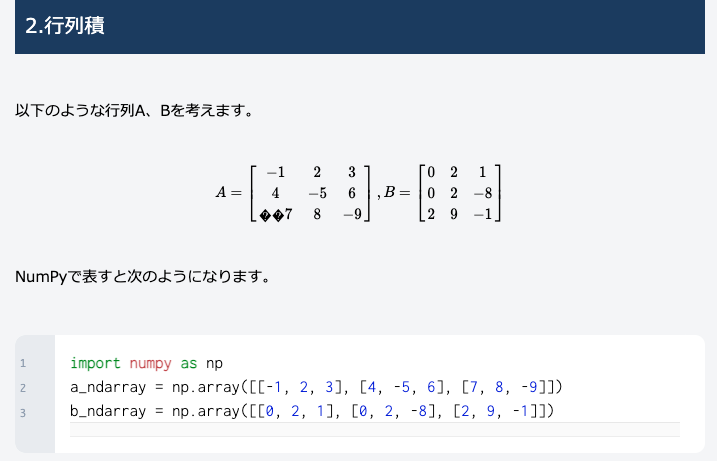

### 【問題1】行列積を手計算する

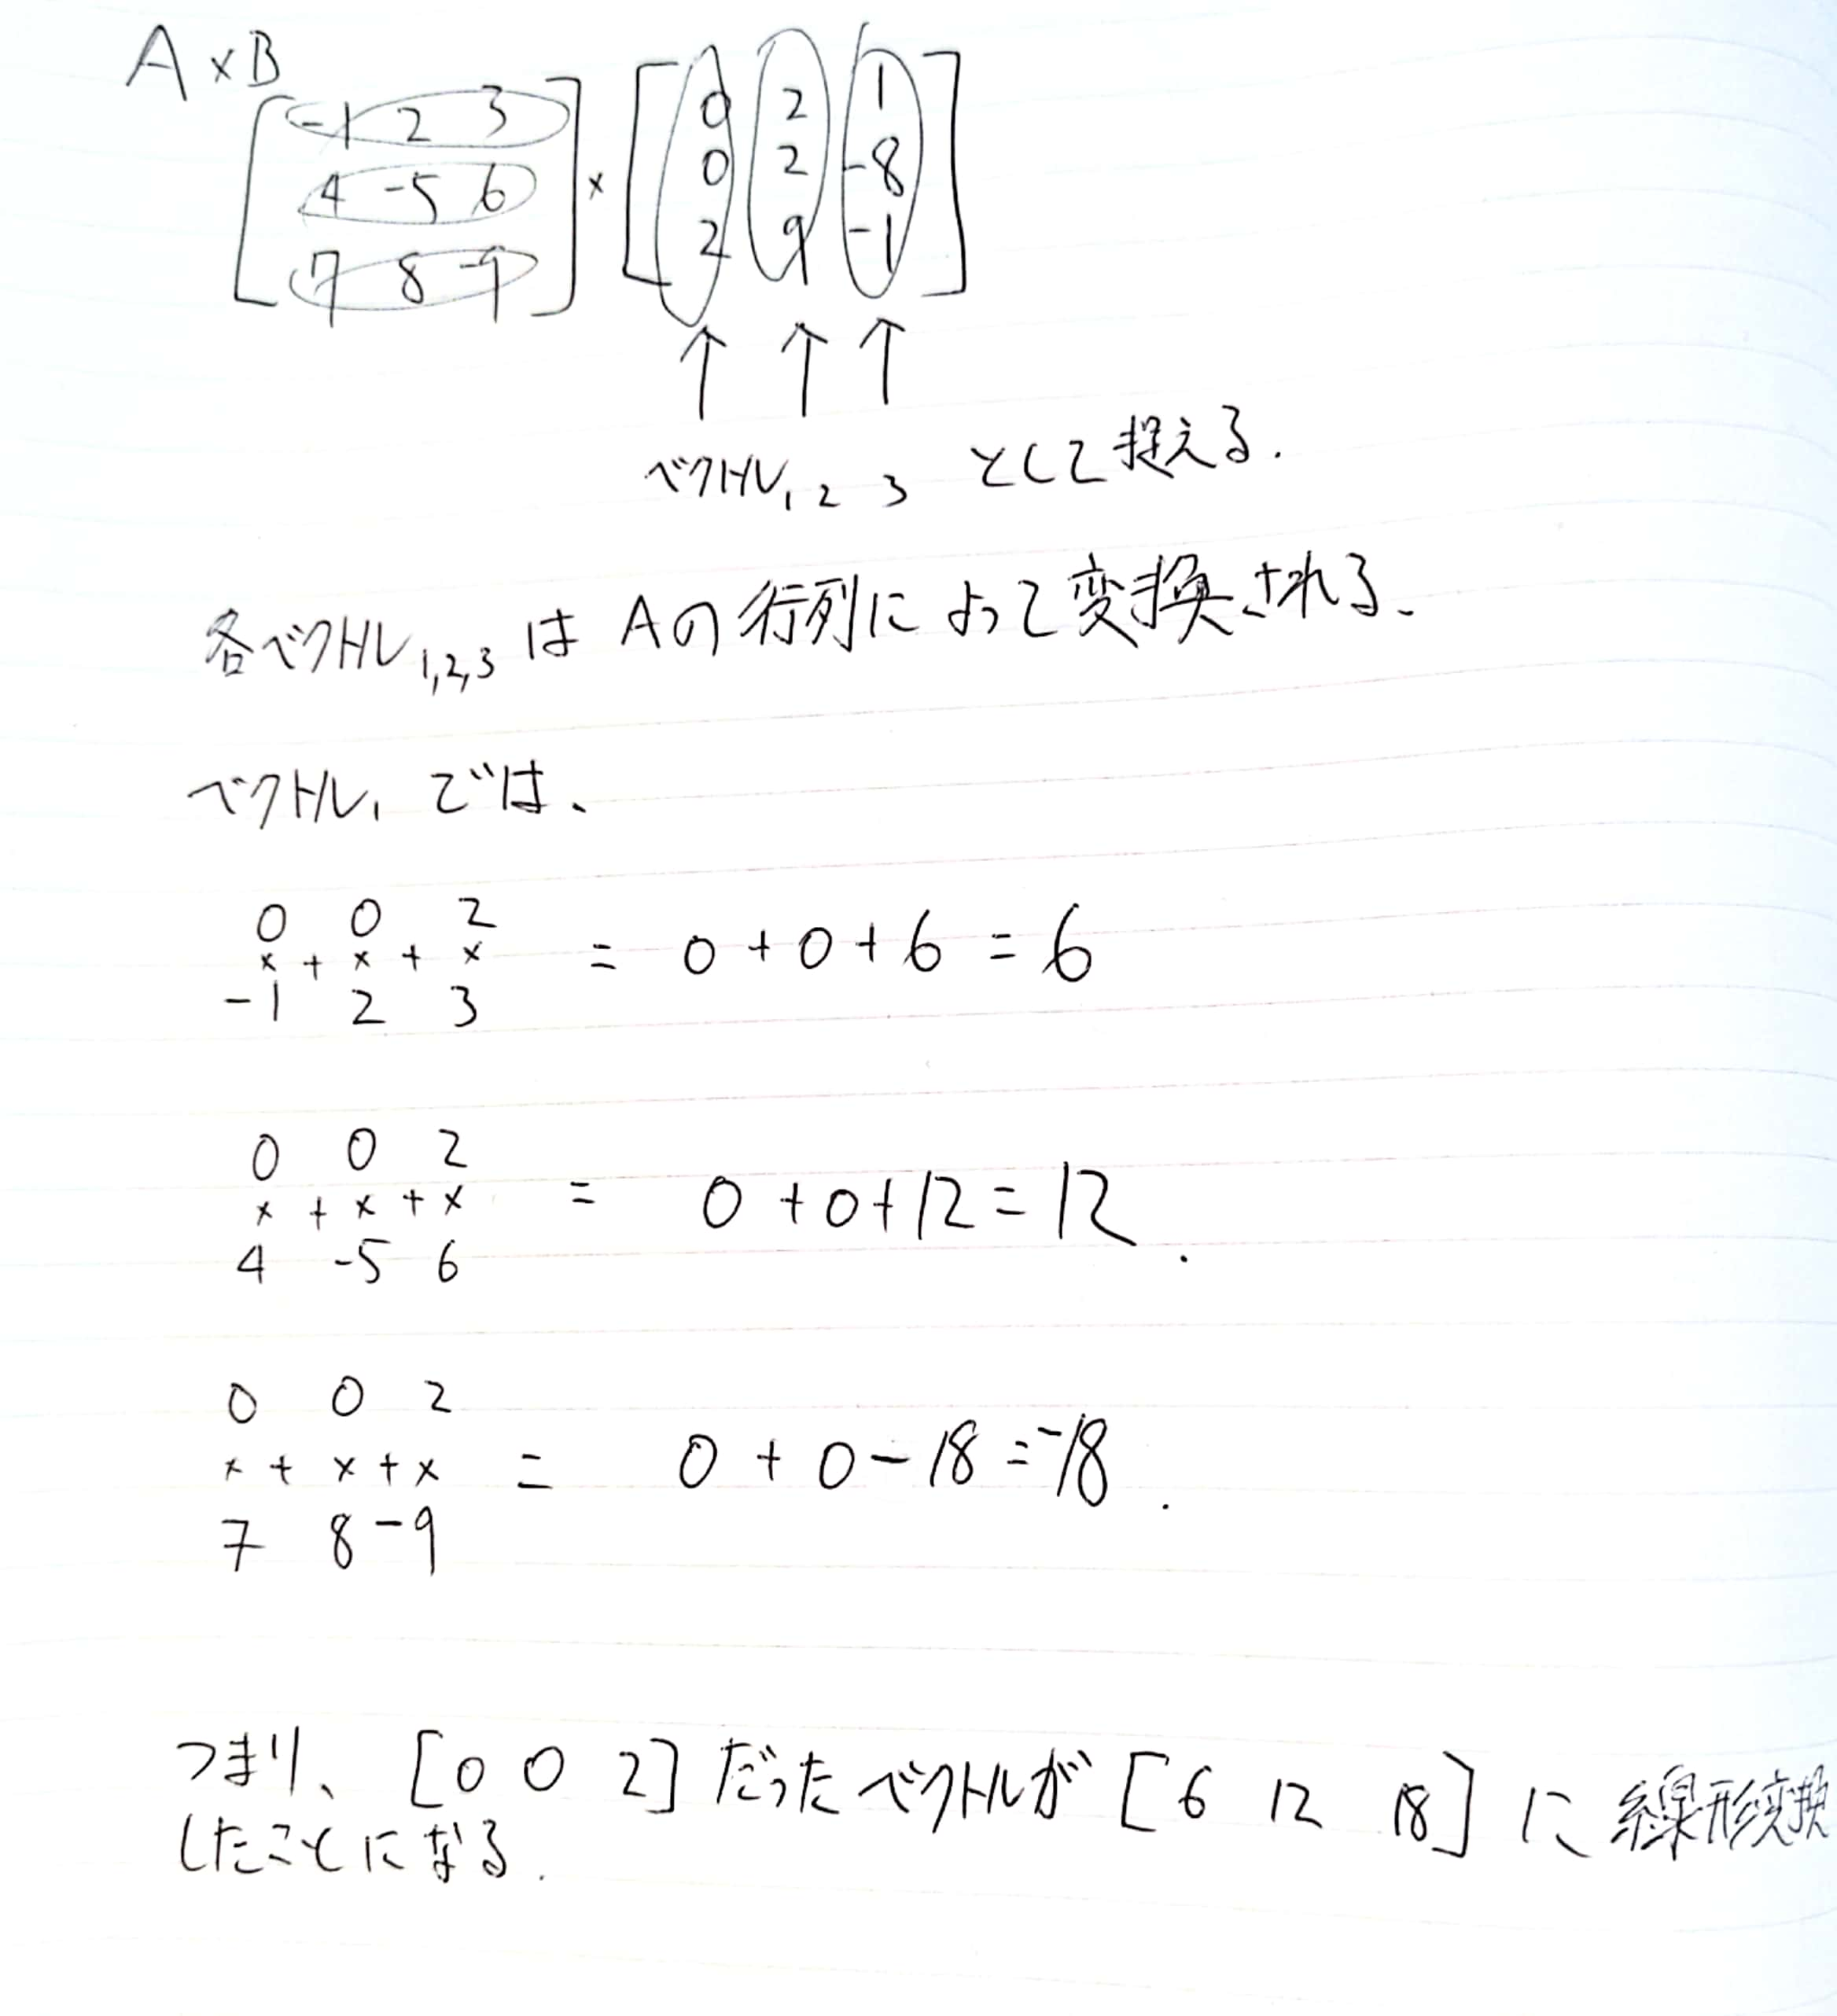

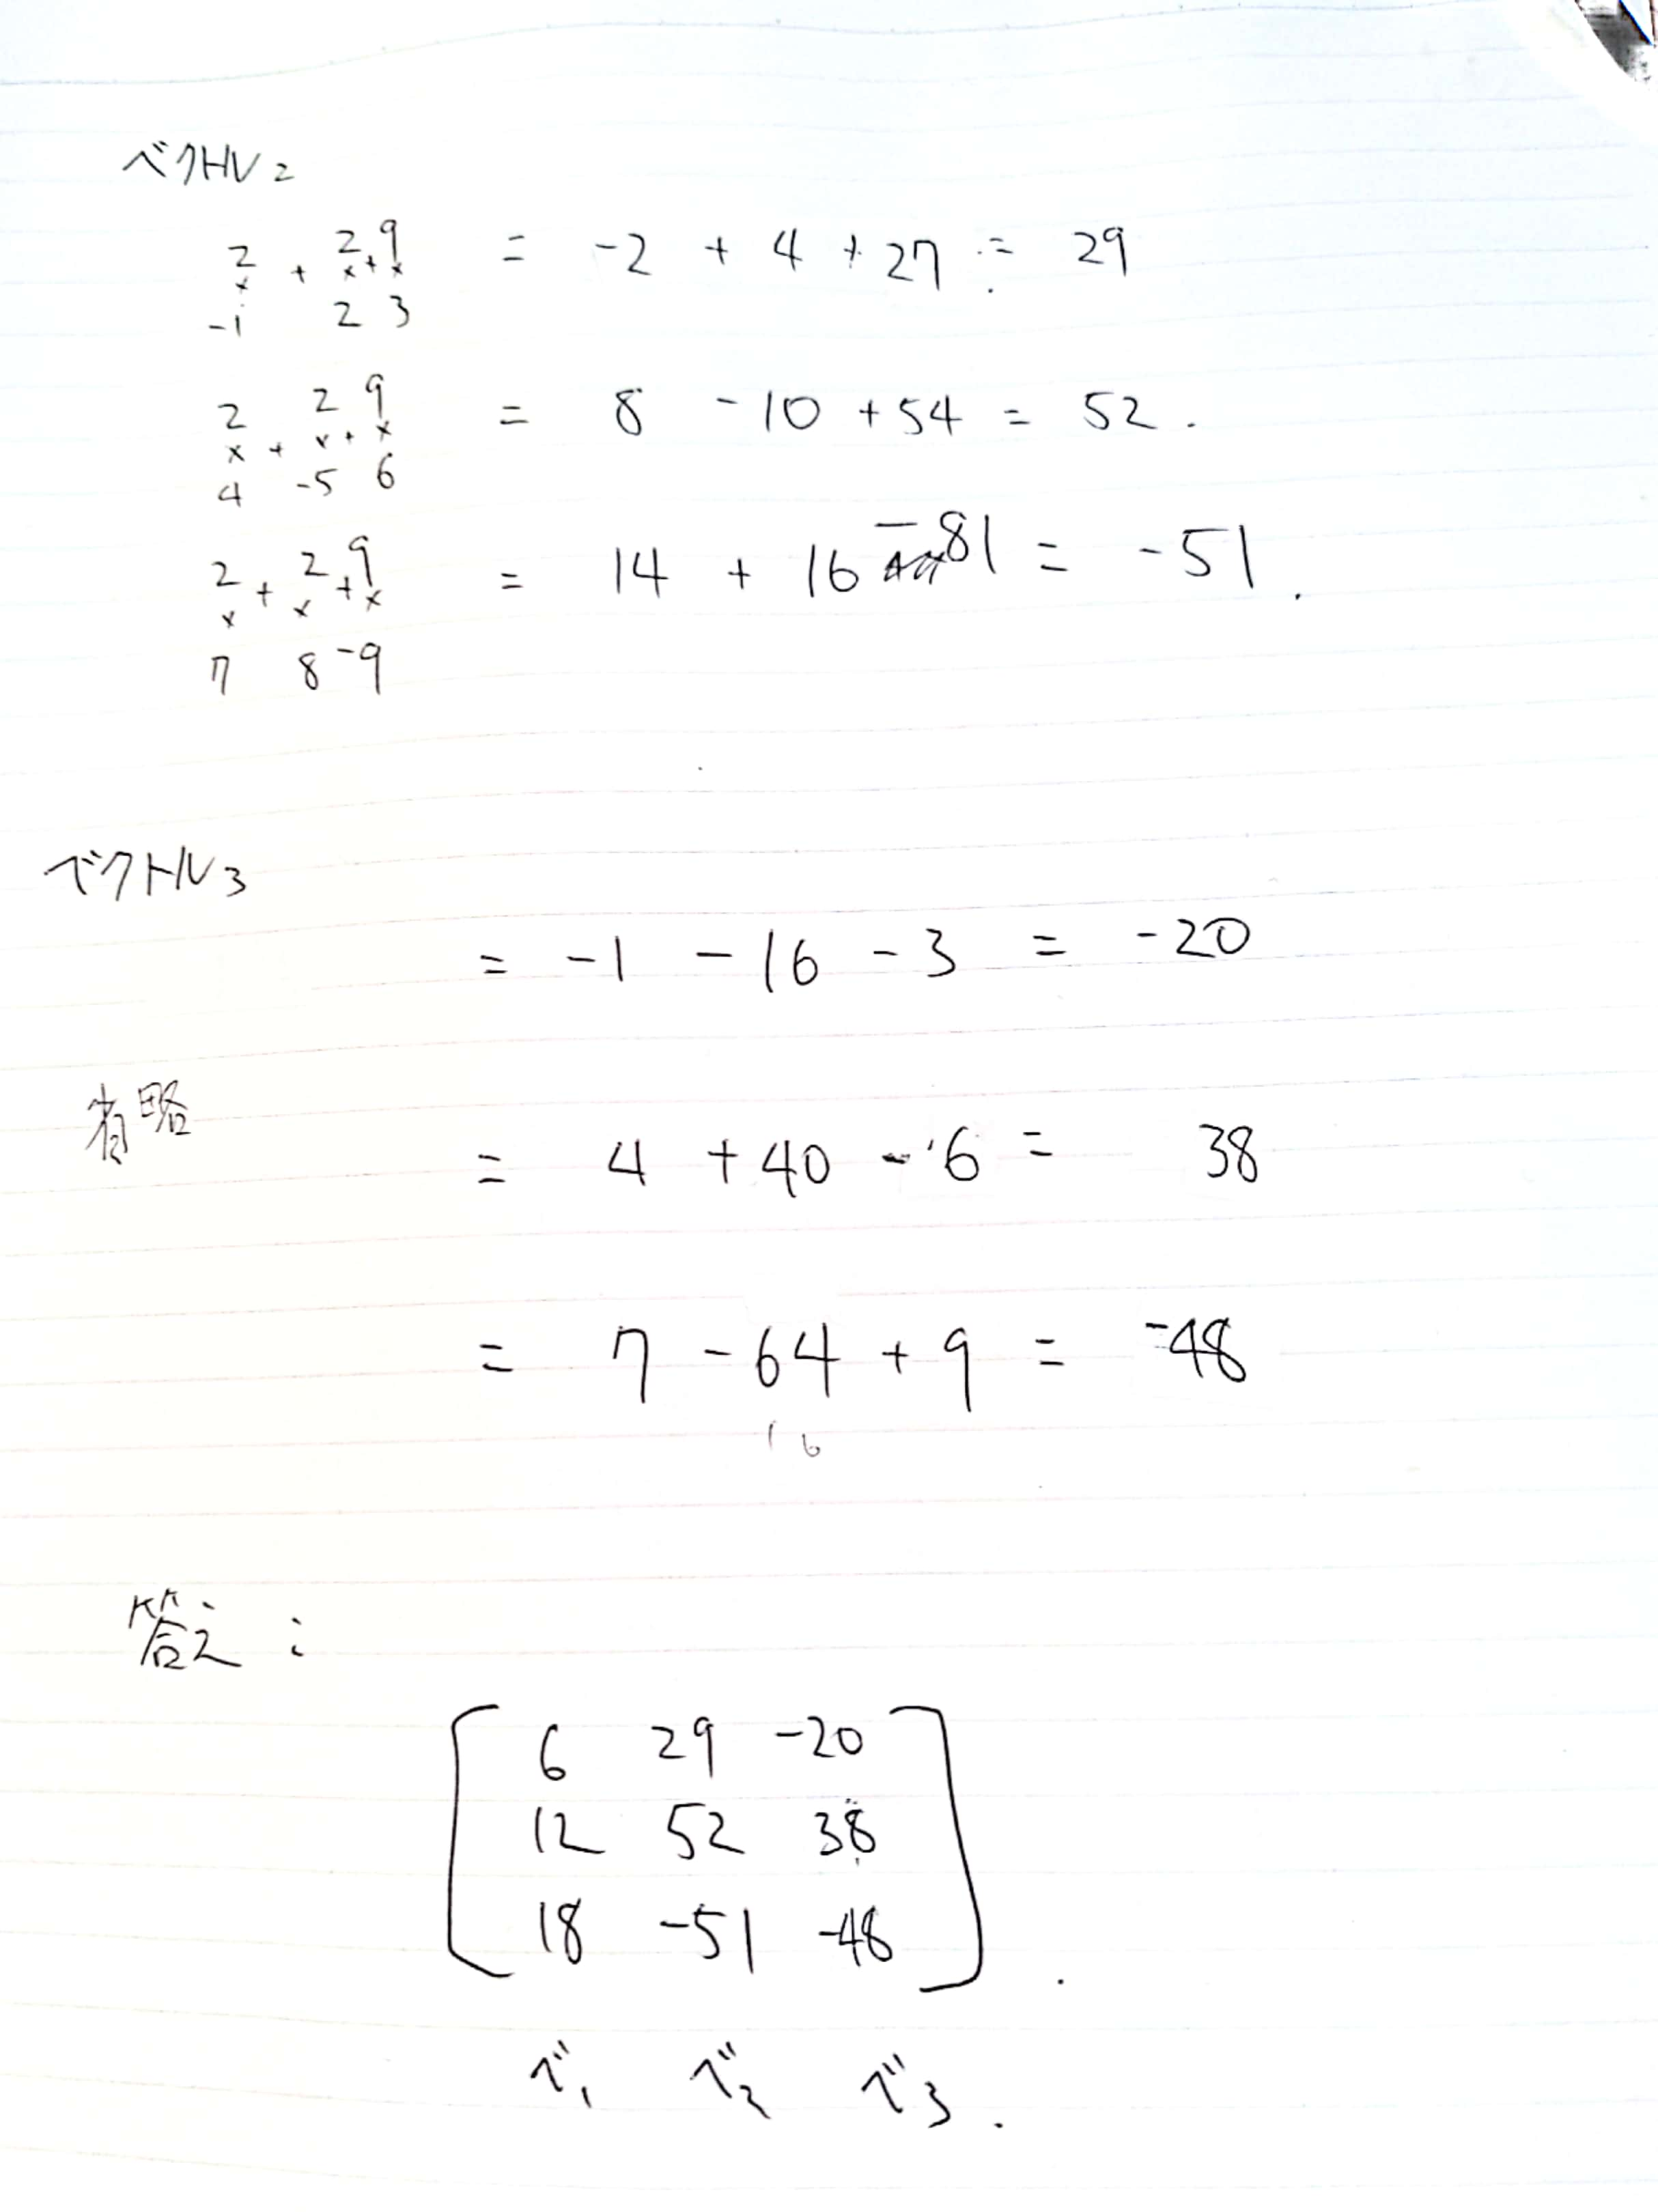

計算過程は上記の通り、内側にあるマトリックスBを外側にあるマトリックスによって変形されている考え方でとく（行ベクトルとしての考え方もあるが）。
FxA（B）＝　C

**注：C[0,2]=-18。答えはー（マイナス）のサインが抜けている**


### 【問題2】NumPyの関数による計算

この行列積はNumPyのnp.matmul()やnp.dot()、または@演算子を使うことで簡単に計算できます。


これらを使い行列積を計算してください。

In [2]:
import numpy as np
a_ndarray = np.array([[-1, 2, 3], [4, -5, 6], [7, 8, -9]])
b_ndarray = np.array([[0, 2, 1], [0, 2, -8], [2, 9, -1]])

In [3]:
# Using np.matmul()

c_ndarray_matmul = np.matmul(a_ndarray, b_ndarray)
c_ndarray_matmul

array([[  6,  29, -20],
       [ 12,  52,  38],
       [-18, -51, -48]])

In [4]:
# Using the arithmetic operator @

c_ndarray_at = a_ndarray @ b_ndarray
c_ndarray_at

array([[  6,  29, -20],
       [ 12,  52,  38],
       [-18, -51, -48]])

In [5]:
# Using np.dot()

c_ndarray_dot = np.dot(a_ndarray, b_ndarray)
c_ndarray_dot

array([[  6,  29, -20],
       [ 12,  52,  38],
       [-18, -51, -48]])

以下の注意点：
- np.matmul()とnp.dot()は3次元以上の配列で挙動が変わります。@演算子はnp.matmul()と同じ働きをします。
- 今回のような2次元配列の行列積ではnp.matmul()や@演算子が公式に推奨されています。以下はnp.dot()の説明からの引用です。

### 【問題3】ある要素の計算を実装

手計算をする際はまず行列Aの0行目と行列Bの0列目に注目し、以下の計算を行ったかと思います。

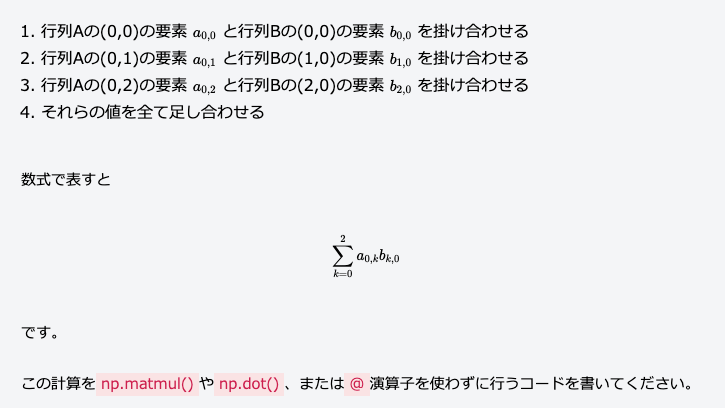

In [6]:
print(len(a_ndarray)) #length of rows
print(len(b_ndarray)) #length of rows
print(len(a_ndarray[0])) #legnth of columns
print(len(b_ndarray[0])) #legnth of columns

test_2 = np.zeros((4, 2))
print(len(test_2)) #length of rows
print(len(test_2[0])) #legnth of columns

3
3
3
3
4
2


### 答え

In [132]:
question_3_c = np.zeros((1,3))

for i in range(len(a_ndarray)):
        question_3_c[0][i] += a_ndarray[0][i]* b_ndarray[i][0]

question_3_c 

array([[0., 0., 6.]])

### 【問題4】行列積を行う関数の作成

問題3のコードを拡張し、行列積のスクラッチ実装を完成させてください。行列AとBを引数に受け取り、行列積を返す関数としてください。


行列積を計算する場合は、問題3の計算を異なる行や列に対して繰り返していくことになります。


計算結果である3×3の行列Cの各要素**c[i][j]**は数式で表すと次のようになります。

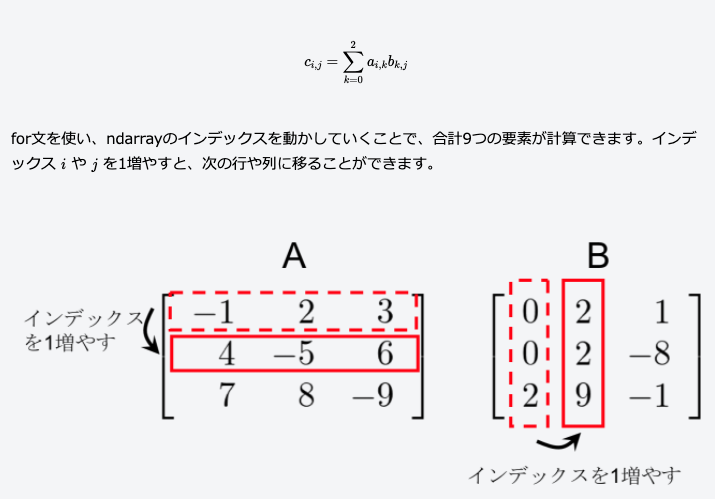

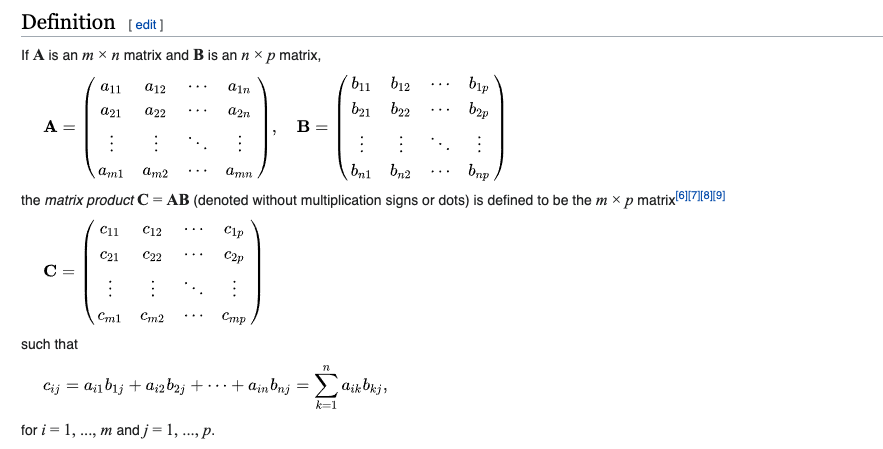

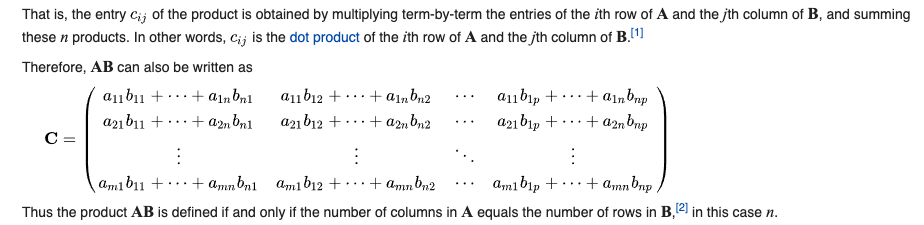

In [26]:
# Answer for example above
c = np.zeros((a_ndarray.shape[0], b_ndarray.shape[1]))

for i in range(len(a_ndarray)):
    # iterate through columns of B
    for j in range(len(b_ndarray[0])):
        # iterate through rows of B
        for k in range(len(b_ndarray)):
            c[i][j] += a_ndarray[i][k] * b_ndarray[k][j]

c

array([[  6.,  29., -20.],
       [ 12.,  52.,  38.],
       [-18., -51., -48.]])

In [28]:
# Function for matrix multiplication

def matrix_multiplication(A, B):
    C = np.zeros((a_ndarray.shape[0], b_ndarray.shape[1]))

    for i in range(len(A)):
        # iterate through columns of B
        for j in range(len(B[0])):
            # iterate through rows of B
            for k in range(len(B)):
                C[i][j] += A[i][k] * B[k][j]
    
    return C

matrix_multiplication(a_ndarray, b_ndarray)

array([[  6.,  29., -20.],
       [ 12.,  52.,  38.],
       [-18., -51., -48.]])

### 【問題5】計算が定義されない入力を判定する

問題4で作成した関数は、実装方法によってはこのDとEの配列を入力しても動いてしまう可能性があります。この場合、不適切な計算が行われることになります。また、途中でエラーになる場合でも、なぜエラーになったかが直接的には分かりづらいメッセージが表示されます。


if文などによってこれを防ぎ、入力される形に問題があることをprint()を使い表示するコードを書き加えてください。

In [47]:
def matrix_multiplication(A, B):
    C = np.zeros((a_ndarray.shape[0], b_ndarray.shape[1]))

    if (A.shape[0] != B.shape[0]) or (A.shape[1] != B.shape[1]) or (A.shape[0] == 1) or (B.shape[0] == 1):
        print("Error in the dimension of the matrix, please check dimensions")
    else:
        for i in range(len(A)):
            # iterate through columns of B
            for j in range(len(B[0])):
                # iterate through rows of B
                for k in range(len(B)):
                    C[i][j] += A[i][k] * B[k][j]
    
        return C

matrix_multiplication(a_ndarray, b_ndarray)

array([[  6.,  29., -20.],
       [ 12.,  52.,  38.],
       [-18., -51., -48.]])

In [48]:
print(m_1.shape[0])
print(m_2.shape[1])

matrix_multiplication(m_1, m_2)

2
2
Error in the dimension of the matrix, please check dimensions


### 【問題6】転置

片方の行列を転置することで、行列積が計算できるようになります。

np.transpose()や.Tアトリビュートを用いて転置し、行列積を計算してください。

In [23]:
# 通常の行列なら計算できる式も、npではブロードキャストをするので、以下の形ではブロードキャストができない

m_1 = np.zeros((2,3))
m_2 = np.ones((3,2))

print(m_1)
print(m_2)

m_1 * m_2

[[0. 0. 0.]
 [0. 0. 0.]]
[[1. 1.]
 [1. 1.]
 [1. 1.]]


ValueError: operands could not be broadcast together with shapes (2,3) (3,2) 

### 答え

In [45]:
# 通常の行列なら計算できる式も、npではブロードキャストをするので、以下の形ではブロードキャストができない

m_1 = np.zeros((2,3))
m_2 = np.ones((3,2))

print(m_1)
print(m_2)

m_1 * m_2.T
#(2,3) * (2, 3)になったことで、後ろの要素数（次元）が一致して、ブロードキャストができるようになった。


[[0. 0. 0.]
 [0. 0. 0.]]
[[1. 1.]
 [1. 1.]
 [1. 1.]]


array([[0., 0., 0.],
       [0., 0., 0.]])